In [470]:
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from test_fonts import *
from NeuralNetwork import  *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Dataset

In [471]:
fonts = get_all_fonts(1,True)
font_count = len(fonts)
font_count

32

## Creating Autoencoder

In [472]:
beta = 0.2

sigmoid = lambda e: 1 / (1 + np.exp(-e * 2 * beta))
sigmoid_derived = lambda e: 2 * beta * sigmoid(e) * (1 - sigmoid(e))

nn = NNBuilder\
    .with_input(7*5)\
    .with_hidden_layer(15,sigmoid,sigmoid_derived)\
    .with_output_layer(7*5,sigmoid,sigmoid_derived)

## Generating training dataset

In [473]:
np.random.shuffle(fonts)
idx = math.floor(font_count * .8)
training, test = np.array(fonts[:idx]), np.array(fonts[idx:])

## Training

In [474]:
training_errors, ws, bs = nn.train_on_dataset(training,training,500,15,0.1)

In [475]:
print(f"training error: {training_errors[-1]}")
print(f"testing error: {nn.get_error_on_dataset(test, test)}")

training error: 0.023508768369125927
testing error: 0.07385605883569257


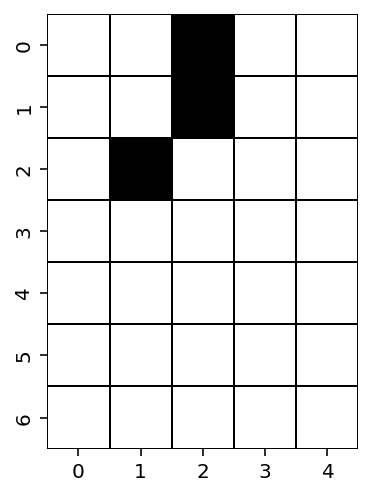

In [476]:
aa = test[0]
value = nn.feed_forward(aa)

print_character(aa.reshape(7,5))

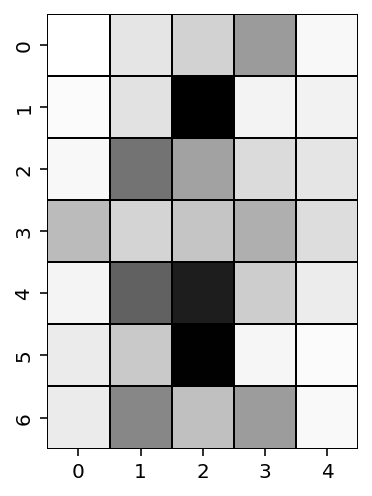

In [477]:
print_character(value.reshape(7,5))